<center><h1>Notebook for Generating Privileged Information for Object Detection Datasets</h1>
<h2>Matthias Bartolo</h2>

</center>

### Defining Paths

In [1]:
# Shared imports
import os
import time

# Paths
yolo_dataset_path = "../datasets/01m-All-1/"  # Base path for your YOLO dataset
output_base_path = "../datasets/01m-All-1/"   # Base path for saving saliency map images
images_path='old_images/' # Path to the images in each dataset subfolder

# Saliency Map Generation (Itti Model)

In [ ]:
import os
import cv2
import numpy as np
import SaRa.saraRC1 as sara

GENERATORS = ['itti', 'deepgaze']  # Available saliency generators

start_time = time.time()

def generate_saliency_maps(yolo_dataset_path, output_base_path, generator='itti', images_path='images'):
    """
    Generate and save saliency map images using the SaRa library for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the saliency map images.
        generator (str): Saliency map generator ('itti' or 'deepgaze').
    """
    if generator not in GENERATORS:
        raise ValueError(f"Invalid generator '{generator}'. Must be one of {GENERATORS}.")

    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, f"Saliency_{generator}")

        # Check if input folder exists
        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            # Process only image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Read the image
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                if image is None:
                    print(f"Could not read image {image_path}")
                    continue

                # Apply saliency map generation
                image_np = np.array(image)
                sara_image = image_np.copy()
                sara.reset()
                
                
                saliency_map = sara.return_saliency(sara_image, generator=generator)                

                # Save the processed image
                cv2.imwrite(output_image_path, saliency_map)
                print(f"Saved saliency map image to {output_image_path}")

# Choose saliency generator and generate saliency maps
generator = 'itti'  # Change to 'deepgaze' as needed
generate_saliency_maps(yolo_dataset_path, output_base_path, generator=generator, images_path=images_path)

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open(f"results/saliency_map_generation_{generator}.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Saliency Map Generation (DeepGaze IIE Model)
Note: This technique takes a long time to run.

In [ ]:
import os
import cv2
import numpy as np
import SaRa.saraRC1 as sara
import warnings
warnings.filterwarnings("ignore")

GENERATORS = ['itti', 'deepgaze']  # Available saliency generators

start_time = time.time()

def generate_saliency_maps(yolo_dataset_path, output_base_path, generator='itti', images_path='images'):
    """
    Generate and save saliency map images using the SaRa library for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the saliency map images.
        generator (str): Saliency map generator ('itti' or 'deepgaze').
    """
    if generator not in GENERATORS:
        raise ValueError(f"Invalid generator '{generator}'. Must be one of {GENERATORS}.")

    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, f"Saliency_{generator}")

        # Check if input folder exists
        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            # Process only image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Read the image
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                if image is None:
                    print(f"Could not read image {image_path}")
                    continue

                # Apply saliency map generation
                image_np = np.array(image)
                sara_image = image_np.copy()
                sara.reset()
                
                
                saliency_map = sara.return_saliency(sara_image, generator=generator)                

                # Save the processed image
                cv2.imwrite(output_image_path, saliency_map)
                print(f"Saved saliency map image to {output_image_path}")

# Choose saliency generator and generate saliency maps
generator = 'deepgaze'  # Change to 'deepgaze' as needed
generate_saliency_maps(yolo_dataset_path, output_base_path, generator=generator, images_path=images_path)

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open(f"results/saliency_map_generation_{generator}.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Depth Map Generation (Depth Anything Model)

In [ ]:
import os
import cv2
import numpy as np
from transformers import pipeline

start_time = time.time()

def generate_depth_maps(yolo_dataset_path, output_base_path, model_name, images_path='images', save_dir='Depth Anything'):
    """
    Generate and save depth estimation images for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the depth images.
        model_name (str): Hugging Face model for depth estimation.
        images_path (str): Path within each subset for the images.
    """
    if not model_name:
        raise ValueError("A model_name must be provided for depth estimation.")

    # Initialize depth estimation pipeline
    import torch
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    pipe = pipeline(task="depth-estimation", model=model_name, device=device)

    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, f"Depth_{save_dir.replace('/', '_')}")

        # Check if input folder exists
        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            # Process only image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Apply depth estimation
                try:
                    depth_map = pipe(image_path)["depth"]
                    processed_image = np.array(depth_map)
                except Exception as e:
                    print(f"Error generating depth map for {image_path} with model '{model_name}': {e}")
                    continue

                # Save the processed image
                cv2.imwrite(output_image_path, processed_image)
                print(f"Saved depth map image to {output_image_path}")

# Generate depth maps
model_name = "LiheYoung/depth-anything-small-hf"  # Model for depth estimation
generate_depth_maps(yolo_dataset_path, output_base_path, model_name=model_name, images_path=images_path)

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open(f"results/depth_map_generation_Depth_Anything.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Depth Map Generation (DPT-Large Model)

In [ ]:
import os
import cv2
import numpy as np
from transformers import pipeline

start_time = time.time()

def generate_depth_maps(yolo_dataset_path, output_base_path, model_name, images_path='images', save_dir='Depth_Anything'):
    """
    Generate and save depth estimation images for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the depth images.
        model_name (str): Hugging Face model for depth estimation.
        images_path (str): Path within each subset for the images.
    """
    if not model_name:
        raise ValueError("A model_name must be provided for depth estimation.")

    # Initialize depth estimation pipeline
    import torch
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    pipe = pipeline(task="depth-estimation", model=model_name, device=device)

    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, f"Depth_{save_dir.replace('/', '_')}")

        # Check if input folder exists
        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            # Process only image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Apply depth estimation
                try:
                    depth_map = pipe(image_path)["depth"]
                    processed_image = np.array(depth_map)
                except Exception as e:
                    print(f"Error generating depth map for {image_path} with model '{model_name}': {e}")
                    continue

                # Save the processed image
                cv2.imwrite(output_image_path, processed_image)
                print(f"Saved depth map image to {output_image_path}")

# Generate depth maps
model_name = "Intel/dpt-large"  # Model for depth estimation
generate_depth_maps(yolo_dataset_path, output_base_path, model_name=model_name, images_path=images_path, save_dir='DPT_Large')

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open(f"results/depth_map_generation_DPT_Large.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Histogram of Oriented Gradients (HOG) Generation
Note: This technique takes a long time to run.

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog

start_time = time.time()

def generate_hog_maps(yolo_dataset_path, output_base_path, images_path='images'):
    """
    Generate and save HOG feature images for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the HOG feature images.
        images_path (str): Path within each subset for the images.
    """
    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, "HoG_Features")

        # Check if input folder exists
        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            # Process only image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Read the image
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Could not read image {image_path}")
                    continue

                # Compute HOG features and visualization
                features, hog_image = hog(
                        image, 
                        pixels_per_cell=(8, 8),  # Standard pixel size
                        cells_per_block=(2, 2),  # Block size for normalization
                        visualize=True, 
                        block_norm='L2-Hys',  # Normalize the block for better detection
                    )
                processed_image = (hog_image * 255).astype(np.uint8)  # Scale to 8-bit image
            

                # Save the processed image
                cv2.imwrite(output_image_path, processed_image)
                print(f"Saved HoG feature image to {output_image_path}")

# Generate HOG maps
generate_hog_maps(yolo_dataset_path, output_base_path, images_path)

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open("results/hog_map_generation.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Local Binary Pattern (LBP) Texture Map Generation

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

start_time = time.time()

def generate_texture_maps(yolo_dataset_path, output_base_path, images_path='images', radius=3, n_points=24):
    """
    Generate and save texture maps using Local Binary Patterns (LBP) for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the texture maps.
        images_path (str): Path within each subset for the images.
        radius (int): Radius of the LBP pattern.
        n_points (int): Number of points in the LBP pattern.
    """
    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, "LBP_Texture_Maps")

        # Check if input folder exists
        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            # Process only image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Read the image
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Could not read image {image_path}")
                    continue

                # Compute the LBP texture map
                try:
                    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
                    processed_image = (lbp / lbp.max() * 255).astype(np.uint8)  # Normalize to 8-bit image
                except Exception as e:
                    print(f"Error generating texture map for {image_path}: {e}")
                    continue

                # Save the processed image
                cv2.imwrite(output_image_path, processed_image)
                print(f"Saved texture map image to {output_image_path}")

# Generate texture maps
generate_texture_maps(yolo_dataset_path, output_base_path, images_path)

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open("results/texture_map_generation.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Canny Edge Detection Map Generation

In [ ]:
import os
import cv2
import numpy as np

start_time = time.time()

def generate_edge_maps(yolo_dataset_path, output_base_path, images_path='images', low_threshold=50, high_threshold=150):
    """
    Generate and save edge maps using Canny Edge Detection for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the edge maps.
        images_path (str): Path within each subset for the images.
        low_threshold (int): Lower threshold for Canny edge detection.
        high_threshold (int): Upper threshold for Canny edge detection.
    """
    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, "Canny_Edge_Maps")

        # Check if input folder exists
        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            # Process only image files
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Read the image
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Could not read image {image_path}")
                    continue

                # Compute the Canny edge map
                try:
                    edges = cv2.Canny(image, low_threshold, high_threshold)
                except Exception as e:
                    print(f"Error generating edge map for {image_path}: {e}")
                    continue

                # Save the processed image
                cv2.imwrite(output_image_path, edges)
                print(f"Saved edge map image to {output_image_path}")

# Generate edge maps
generate_edge_maps(yolo_dataset_path, output_base_path, images_path)

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open("results/canny_edge_map_generation.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Corner Harris Edge Detection Map Generation

In [ ]:
import os
import cv2
import numpy as np

start_time = time.time()

def generate_corner_maps(yolo_dataset_path, output_base_path, images_path='images', block_size=2, ksize=3, k=0.04, threshold_ratio=0.02):
    """
    Generate and save corner maps using Harris Corner Detection for a YOLO dataset.

    Args:
        yolo_dataset_path (str): Path to the dataset with train, test, valid folders.
        output_base_path (str): Path to save the corner maps.
        images_path (str): Path within each subset for the images.
        block_size (int): Neighborhood size for Harris Corner Detection.
        ksize (int): Aperture size for Sobel operator.
        k (float): Harris detector free parameter.
        threshold_ratio (float): Ratio of max corner response to consider as a strong corner.
    """
    for subset in ["train", "test", "valid"]:
        input_folder = os.path.join(yolo_dataset_path, subset, images_path)
        output_folder = os.path.join(output_base_path, subset, "Harris_Corner_Maps")

        if not os.path.exists(input_folder):
            print(f"Skipping {subset} as directory {input_folder} does not exist.")
            continue

        os.makedirs(output_folder, exist_ok=True)

        for image_file in os.listdir(input_folder):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(input_folder, image_file)
                output_image_path = os.path.join(output_folder, image_file)

                # Read the image
                image = cv2.imread(image_path)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                if gray is None:
                    print(f"Could not read image {image_path}")
                    continue

                try:
                    # Compute Harris corner response
                    corners = cv2.cornerHarris(gray, block_size, ksize, k)

                    # Normalize and threshold
                    corners = cv2.dilate(corners, None)  # Dilate for better visualization
                    threshold = threshold_ratio * corners.max()
                    corner_map = np.zeros_like(gray)

                    # Mark strong corners
                    corner_map[corners > threshold] = 255

                    # Overlay corners on original image for better visualization
                    # overlay = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
                    overlay = np.zeros_like(image)
                    overlay[corner_map == 255] = [0, 0, 255]  # Mark corners in red
                except Exception as e:
                    print(f"Error generating corner map for {image_path}: {e}")
                    continue
                
                #  Change to Gray
                overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2GRAY)

                # Save the processed image
                cv2.imwrite(output_image_path, overlay)
                print(f"Saved corner map image to {output_image_path}")

# Generate corner maps
generate_corner_maps(yolo_dataset_path, output_base_path, images_path)

end_time = time.time()
duration = end_time - start_time
# Save the duration to a file
os.makedirs("results", exist_ok=True)
with open("results/harris_corner_map_generation.txt", "w") as f:
    f.write(f"Duration: {duration:.2f} seconds")

# Displaying the Generated Privileged Information

Randomly selected image: ../datasets/01m-All-1/train/old_images\IMG_1467_00_jpeg.rf.1fd2f241c4e5b5a55c80b0ef05c0cd24.jpg


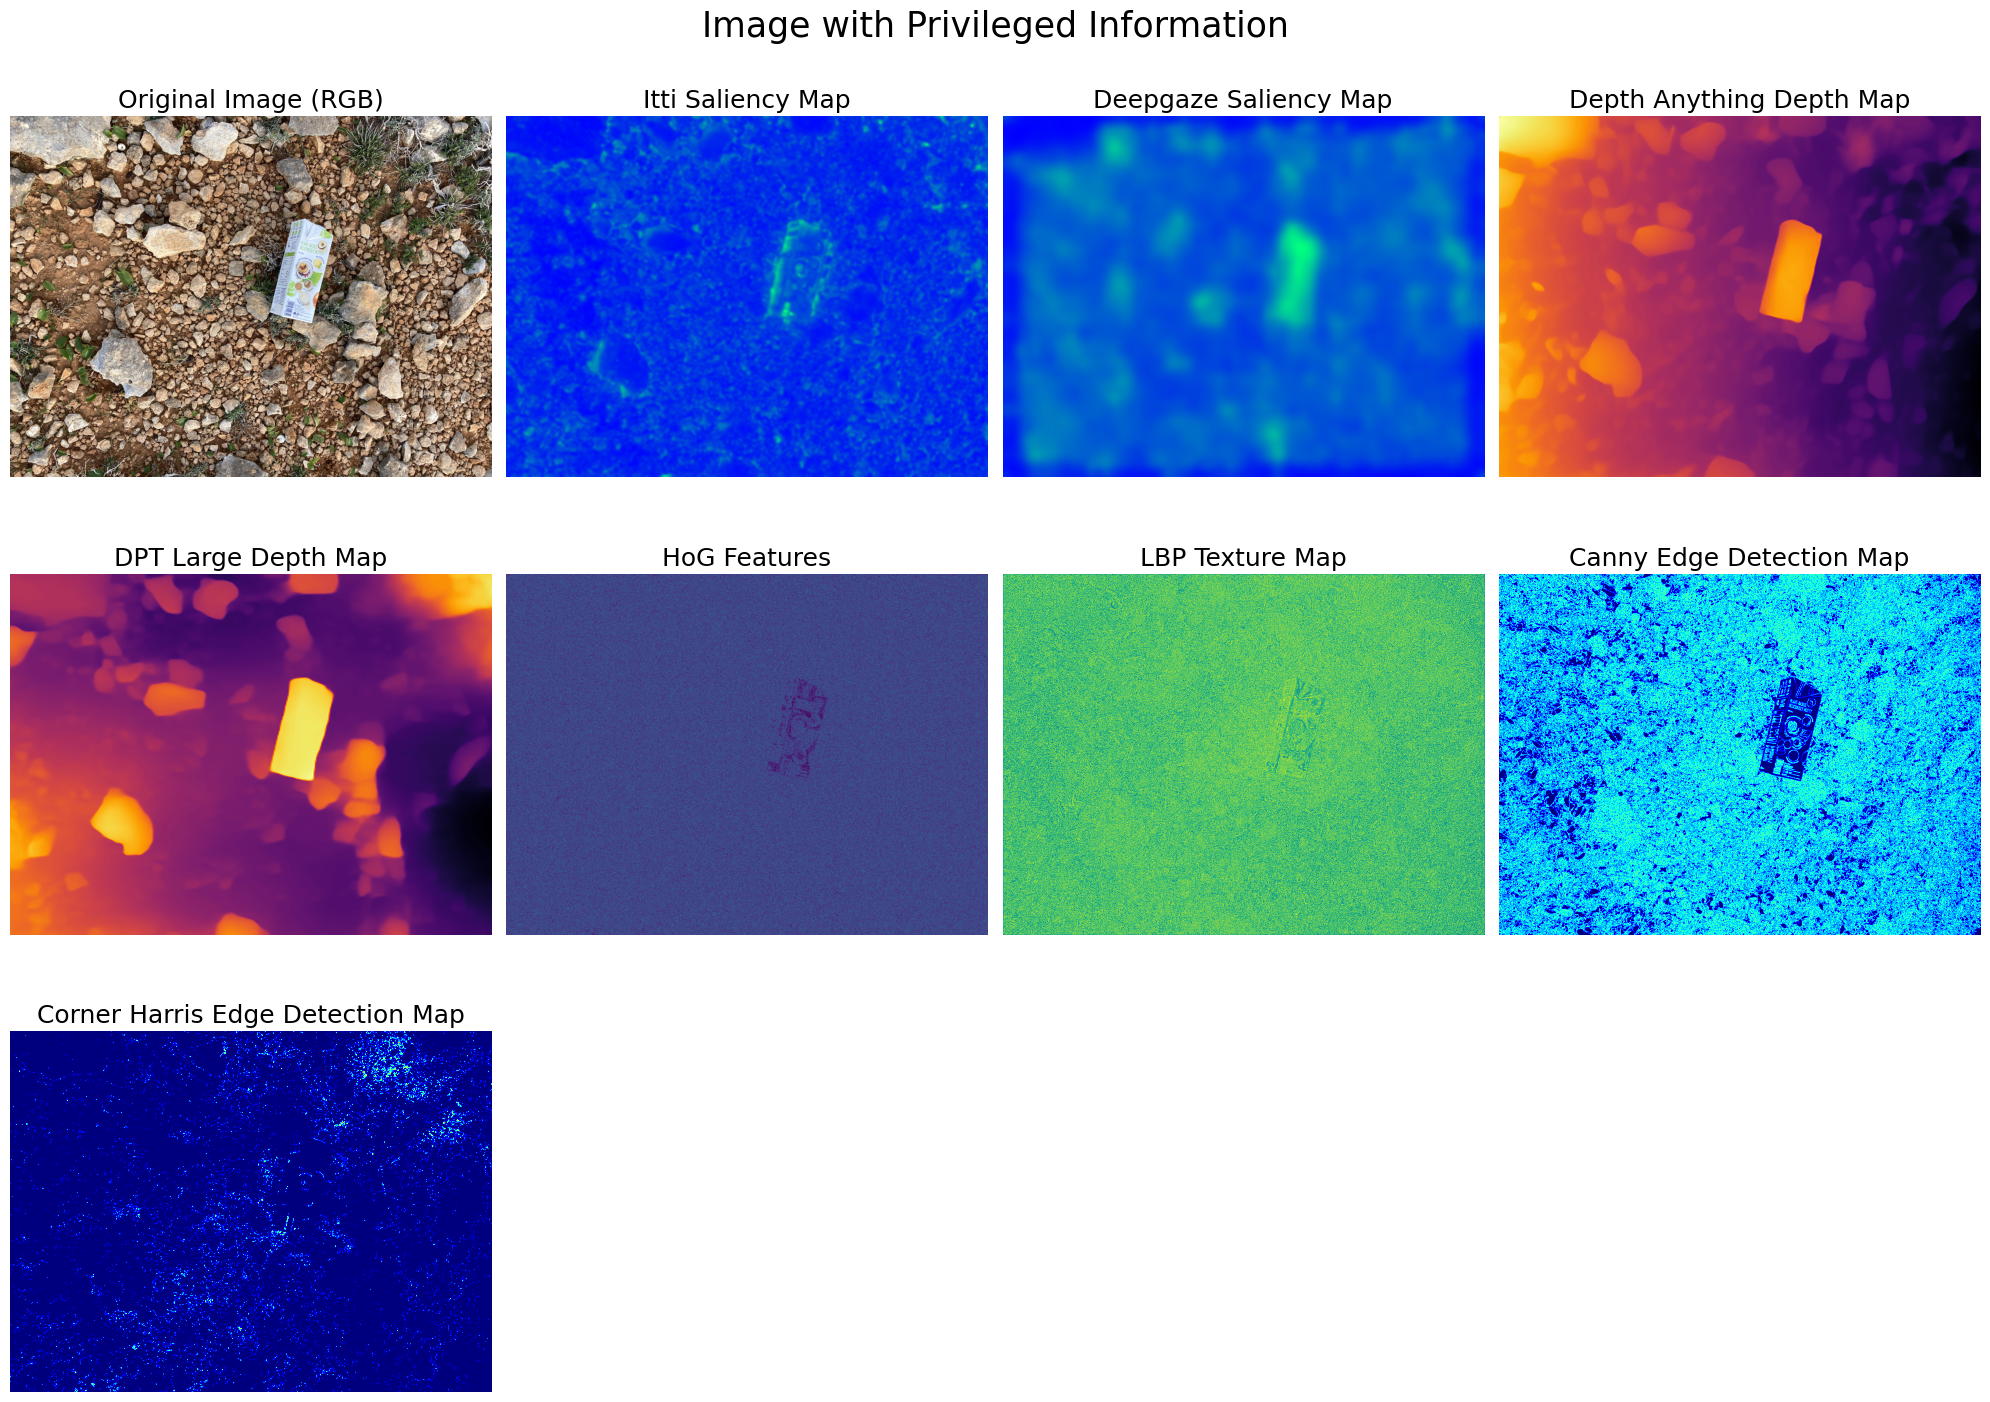

In [5]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

def choose_random_image_from_folder(folder_path):
    """
    Choose a random image from the specified folder.
    Args:
        folder_path (str): Path to the folder containing images.
    """
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    if not image_files:
        print(f"No image files found in {folder_path}.")
        return
    
    # Choose a random image from the list
    random_image = random.choice(image_files)
    
    # Full path to the random image
    random_image_path = os.path.join(folder_path, random_image)
    
    print(f"Randomly selected image: {random_image_path}")
    return random_image, random_image_path

def plot_image_with_privileged_info(image_paths_with_info):
    """Plot multiple images with different colormaps and add a suptitle."""
    columns = 4
    rows = (len(image_paths_with_info) + columns - 1) // columns  # Compute rows

    plt.figure(figsize=(20, rows * 5))
    plt.suptitle("Image with Privileged Information", fontsize=25)

    for idx, img_info in enumerate(image_paths_with_info):
        image_path = img_info['image_path']
        title = img_info['title']
        cmap = img_info['cmap']

        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        if image is None:
            print(f"Error loading image {image_path}.")
            continue

        if len(image.shape) == 3 and image.shape[2] == 3:  # Convert BGR to RGB if needed
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, columns, idx + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(title, fontsize=18)
        plt.axis("off")

    plt.subplots_adjust(wspace=0.2, hspace=0.02)  # Reduce space between subplots
    plt.tight_layout()
    plt.show()

# Example usage: specify the path to your 'combined_images' and 'edge_images' folder
images_folder = '../datasets/01m-All-1/train/old_images'  # Replace with actual path
Itti_images_folder = '../datasets/01m-All-1/train/Saliency_itti'  # Replace with actual path
Deepgaze_images_folder = '../datasets/01m-All-1/train/Saliency_deepgaze'  # Replace with actual path
Depth_Anything_images_folder = '../datasets/01m-All-1/train/Depth_Depth_Anything'  # Replace with actual path
Dpt_Large_images_folder = '../datasets/01m-All-1/train/Depth_DPT_Large'  # Replace with actual path
HoG_images_folder = '../datasets/01m-All-1/train/HoG_Features'  # Replace with actual path
Lbp_images_folder = '../datasets/01m-All-1/train/LBP_Texture_Maps'  # Replace with actual path
Canny_Edge_images_folder = '../datasets/01m-All-1/train/Canny_Edge_Maps'  # Replace with actual path
Harris_Corner_images_folder = '../datasets/01m-All-1/train/Harris_Corner_Maps'  # Replace with actual path

# Choose a random image from the combined images folder
random_image_name, random_image_path = choose_random_image_from_folder(images_folder)

# Construct the path for the corresponding image in each folder
itti_image_path = os.path.join(Itti_images_folder, random_image_name)
deepgaze_image_path = os.path.join(Deepgaze_images_folder, random_image_name)
depth_anything_image_path = os.path.join(Depth_Anything_images_folder, random_image_name)
dpt_large_image_path = os.path.join(Dpt_Large_images_folder, random_image_name)
hog_image_path = os.path.join(HoG_images_folder, random_image_name)
lbp_image_path = os.path.join(Lbp_images_folder, random_image_name)
canny_edge_image_path = os.path.join(Canny_Edge_images_folder, random_image_name)
harris_corner_image_path = os.path.join(Harris_Corner_images_folder, random_image_name)

# Define a list of image paths with titles and colormap (cmap)
images_with_info = [
    {'image_path': random_image_path, 'title': 'Original Image (RGB)', 'cmap': 'gray'},
    {'image_path': itti_image_path, 'title': 'Itti Saliency Map', 'cmap': 'winter'},
    {'image_path': deepgaze_image_path, 'title': 'Deepgaze Saliency Map', 'cmap': 'winter'},
    {'image_path': depth_anything_image_path, 'title': 'Depth Anything Depth Map', 'cmap': 'inferno'},
    {'image_path': dpt_large_image_path, 'title': 'DPT Large Depth Map', 'cmap': 'inferno'},
    {'image_path': hog_image_path, 'title': 'HoG Features', 'cmap': 'viridis'},
    {'image_path': lbp_image_path, 'title': 'LBP Texture Map', 'cmap': 'viridis'},
    {'image_path': canny_edge_image_path, 'title': 'Canny Edge Detection Map', 'cmap': 'jet'},
    {'image_path': harris_corner_image_path, 'title': 'Corner Harris Edge Detection Map', 'cmap': 'jet'},
]

plot_image_with_privileged_info(images_with_info)